# SPT analysis - Interactive report
###### AB @ BCB ITQB 


### Instructions:
1. To run a cell select it and press **SHIFT+ENTER**;
2. All cells require the **previous** one to be run first;
3. If you change the loaded file through the dropdown menu, **RUN** the interactive graph cell (the next one) again to update the data 
4. If you make a mistake in the order or just want to restart the report **restart the kernel** and start from the beginning
5. Reading a .npy file takes a few seconds depending on its size. The loading is cached, meaning that loading a previously loaded file is instant.
---

### Import required functions

In [1]:
%matplotlib widget
from ReportJupyter import *

### Choose folder that contains all npy's

In [2]:
# Choose folder
root = Tk()
rootdir = filedialog.askdirectory()
root.destroy()

load_widget = interactive(FileLoader, 
                          folder=Dropdown(options=os.listdir(rootdir), description='Experimental conditions:', disabled=False), 
                          root = fixed(rootdir))
display(load_widget)

out = Output()
button = Button(description="Click here to preload ALL data")
button.on_click(partial(loadall, rootdir, out))
display(button)
display(out)


interactive(children=(Dropdown(description='Experimental conditions:', options=('2021-11-15_divIB_30C', '2021-…

Button(description='Click here to preload ALL data', style=ButtonStyle())

Output()

### Interactive filtering
- Filter the tracks by assigning a maximum allowed angle;
- This angle refers to the deviation of the Z-ring ellipse to a perfect circle
- Higher angles correspond to slanted rings and higher errors

In [3]:
TrackObjects = np.array(load_widget.result)
angle = np.rad2deg(np.arccos([i.ellipse['minor']/i.ellipse['major'] for i in TrackObjects]))

angle_wid = interactive(Update_Graphs, 
            angle_threshold= IntSlider(min=1, max=91, step=2, value=60), 
            all_tracks=fixed(TrackObjects), 
            angles=fixed(angle))

accordion = Accordion(children=[angle_wid], titles=('Filter by angle'))
accordion


Accordion(children=(interactive(children=(IntSlider(value=60, description='angle_threshold', max=91, min=1, st…

### Interactive comparison
- After defining appropriate filtering in the above cells select tracks for comparison
- By default, adding a ftsW conditions WILL look for the corresponding divIB

In [4]:
selections = SelectMultiple(
    options=os.listdir(rootdir),
    description='Available Tracks',
    rows=len(os.listdir(rootdir)),
    width=200,
    disabled=False
)




angle = BoundedIntText(
    value=70,
    min=0,
    max=90,
    step=1,
    description='Angle Threshold:',
    disabled=False
)

comparison_wid = interactive(ViolinComparison, conditions=selections, root=fixed(rootdir), anglethresh=angle)
comparison_wid

interactive(children=(SelectMultiple(description='Available Tracks', options=('2021-11-15_divIB_30C', '2021-11…

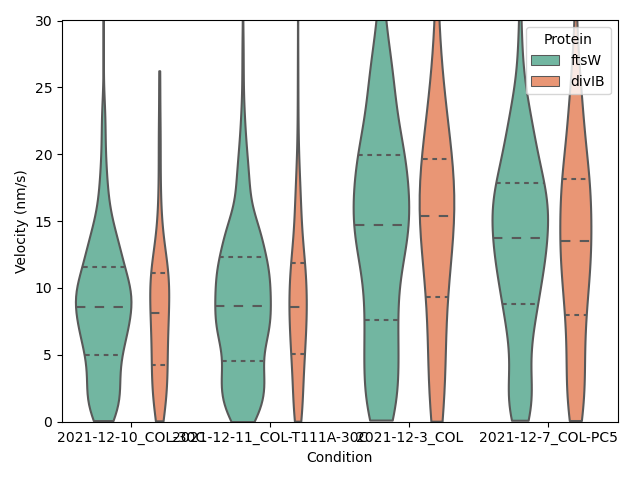

In [14]:
final_all = comparison_wid.result
plt.figure()
g = sns.violinplot(x="Condition", y="Velocity (nm/s)", hue="Protein", data=final_all[final_all['Method']=='Brute Force'], split=False, cut=0, scale='count', scale_hue='False', inner='quartile', palette='Set2', col_wrap=2, sharex=False, aspect=1.5)
plt.ylim((0,30))
plt.tight_layout()
plt.show()
